<a href="https://colab.research.google.com/github/rajagopalmotivate1/DeepLearningHandsonWorkshop/blob/master/1_1_MNIST_Predict_with_Dense_and_Tune_Capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *My Deep Learning Jump start Project No. 1 . 1 

1.   List item
2.   List item



# My 1st Deep Learning experiement , with some few lines of adventures  
##Given an image (digit), predict what class this image belongs. 
### X is 28x28 image , Y is a label (can be any digit between 0 to 9)

# My name: 

##Here are my steps
###Step 1: Define the Problem and Collect data, Load the collected data, Visuvalize it
###Step 2: Prepare the data (vectorize, reshape, normalize, OHE)
###Step 3: Define the network architecture
###Step 4: Define the metrics, optimizers, loss function, and Complie the model
###Step 5: Train the network
###Step 6: Evaluate the network, Iterate to improve the model
###Step 7: Predict

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.utils import plot_model
from IPython.display import Image


Using TensorFlow backend.



# 1. Download the MNIST dataset, and load it into 4 variables
```
(trainX, trainY), (testX, testY) = mnist.load_data()

```
##Tip 1.  aKerasDataset. load_data(): This method returns 4 variables

##Tip 2.  type(myObject) : Use this to find the type of object 
          (e.g. is it a interger, array)

##Tip 3.  myArrary.shape returns the size of the array. 
            1 D array of 10 elements will be (10).              
            2 D array will be (8, 8). 





In [2]:
#Step 1: Load the collected data, Visuvalize it

(trainX, trainY), (testX, testY) = mnist.load_data()


print('The type of object is ..')
print(type(trainX))

numberofTrainingsamples = trainX.shape[0]
print("number of Training samples = " + str(numberofTrainingsamples))

print( "Shape of trainX: "+ str(trainX.shape) + ".   Shape of trainY" + str( trainY.shape))
print( "Shape of testX: "+ str(testX.shape) )


print("number of Test samples = " + str(testX.shape[0]))



The type of object is ..
<class 'numpy.ndarray'>
number of Training samples = 60000
Shape of trainX: (60000, 28, 28).   Shape of trainY(60000,)
Shape of testX: (10000, 28, 28)
number of Test samples = 10000


#2. Visuvalize one of the elements of the dataset

TrainY [76] is labels as = 2
TrainX [76] is a image and looks like this...


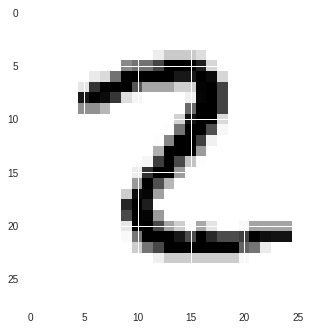

Shape of this image is (28, 28)


In [3]:
print("TrainY [76] is labels as = " + str(trainY[76]))
print("TrainX [76] is a image and looks like this...")
pyplot.imshow(trainX[76])
pyplot.show()
print( "Shape of this image is "+ str(trainX[76].shape) )



# 2.a Normalize values by dividing by 255

Check the values of the arrary before and after dividing it by 255. We divide to normalize the values between 0 and 1 

## Tip 1: matplotlib.pyplot.imshow(myArray): Use this to plot an array as a image


In [4]:
#Step 2: Prepare the data (vectorize, reshape, normalize, OHE)

print("trainY: "+ str(trainY[2]))
trainYready = to_categorical(trainY)
print("trainYOHE: "+ str(trainYready[2]))
testYready = to_categorical(testY)



trainY: 4
trainYOHE: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:

trainXnormalized =  trainX.astype('float32') / 255

testXnormalized = testX.astype('float32')/ 255

In [6]:
print("Shape of trainXnormalized[0] is "+ str(trainXnormalized.shape[0]))


print( "\n Shape of trainXnormalized is "+ str(trainXnormalized.shape) )

trainXready = trainXnormalized.reshape( trainXnormalized.shape[0], 28*28 )

testXready = testXnormalized.reshape( testXnormalized.shape[0], 28*28 )

print( " Shape of trainXready is      "+ str(trainXready.shape) )





Shape of trainXnormalized[0] is 60000

 Shape of trainXnormalized is (60000, 28, 28)
 Shape of trainXready is      (60000, 784)


#3. Define the network architecture



In [7]:
#Step 3: Define the network architecture
network = models.Sequential(name='My first Neural network , thanks Karunya')
layer1 = layers.Dense(120, input_shape=(28*28,), activation='relu')
network.add(layer1)
layer2 = layers.Dense(50, activation='relu')
network.add(layer2)
layer3 = layers.Dense(30, activation='relu')
network.add(layer3)
layer4 = layers.Dense(10, activation='softmax')
network.add(layer4)


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
print(network.name)

print("Here is architecture of my neural network..  ")

print(network.summary())

My first Neural network , thanks Karunya
Here is architecture of my neural network..  
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               94200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 102,090
Trainable params: 102,090
Non-trainable params: 0
_________________________________________________________________
None


This is neural network model is a Fully Connected Neural network consisting of 3 Dense layers
Input is a array of 784 elements 
Output is one of 10 classes 
My first Neural network , thanks Karunya


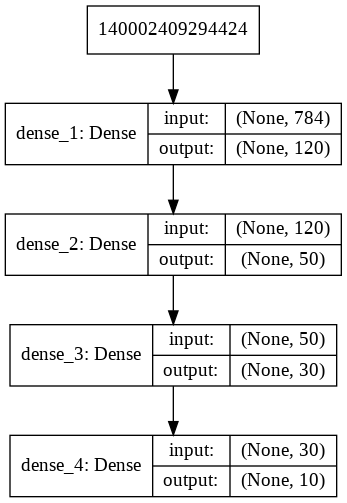

In [9]:
# Plot model graph

print('This is neural network model is a Fully Connected Neural network consisting of 3 Dense layers')
print('Input is a array of 784 elements ')
print('Output is one of 10 classes ')

print(network.name)

print(network)

plot_model(network, show_shapes=True, show_layer_names=True, to_file='my1stmodel.png')
Image(retina=True, filename='my1stmodel.png')





In [0]:
from google.colab import files
files.download('my1stmodel.png')

#4. Choose the loss funtion

In [0]:
#Step 4: Define the metrics, optimizers, loss function, and Complie the model
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
#5. Train the network 

# 5. Train the network

##Tip 1 : myModel.fit( X, Y ) trains the neural network with dataset (X, Y ). 
It returns a log history, which is a log of values in each iteration 

In [13]:
#Step 5: Train the network
history = network.fit( trainXready, trainYready, batch_size=32, epochs=20,validation_split=0.02)


Instructions for updating:
Use tf.cast instead.
Train on 58800 samples, validate on 1200 samples
Epoch 1/12
58800/58800 [==============================] - 9s 153us/step - loss: 0.2592 - acc: 0.9231 - val_loss: 0.1409 - val_acc: 0.9600
Epoch 2/12
58800/58800 [==============================] - 8s 137us/step - loss: 0.1176 - acc: 0.9655 - val_loss: 0.1283 - val_acc: 0.9717
Epoch 3/12
58800/58800 [==============================] - 8s 137us/step - loss: 0.0892 - acc: 0.9748 - val_loss: 0.1366 - val_acc: 0.9692
Epoch 4/12
58800/58800 [==============================] - 8s 137us/step - loss: 0.0744 - acc: 0.9780 - val_loss: 0.1269 - val_acc: 0.9783
Epoch 5/12
58800/58800 [==============================] - 8s 138us/step - loss: 0.0649 - acc: 0.9814 - val_loss: 0.1148 - val_acc: 0.9733
Epoch 6/12
58800/58800 [==============================] - 8s 137us/step - loss: 0.0553 - acc: 0.9844 - val_loss: 0.1512 - val_acc: 0.9742
Epoch 7/12
58800/58800 [==============================] - 8s 138us/step - l

# 6. Predict what class a image belongs to

### Tip 1. myModel.predict() accepts a array 

Predicted Results: [[0.0000000e+00 6.2190353e-28 1.0000000e+00 4.6644840e-24 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.3242451e-24 3.8330574e-29 0.0000000e+00]]
Predicted Results: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Ground Truth OHE : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Ground Truth :      [2]
Predicited class is : 2
My nerual network predicts the below image as : 2


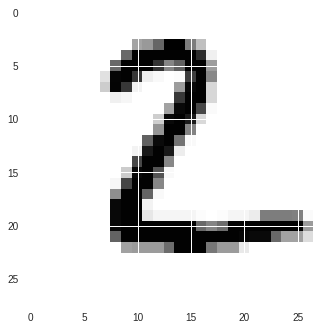

In [14]:
import numpy as np

#Step 7: Predict


predictedResults = network.predict(testXready[1:2])
print("Predicted Results: " + str(predictedResults))
predictedclass = predictedResults.argmax()


predictedResults = np.around(predictedResults)
print("Predicted Results: " + str(predictedResults))


print("Ground Truth OHE : " + str(testYready[1:2]))

print("Ground Truth :      " + str(testY[1:2]))

print("Predicited class is : " + str(predictedclass))

print("My nerual network predicts the below image as : " + str(predictedclass))


pyplot.imshow(testX[1])
pyplot.show()


Predicted Results: [[2.6898151e-13 1.7249362e-09 6.2652144e-18 6.1396466e-20 1.1493914e-15
  5.3793911e-15 1.0000000e+00 4.0386754e-21 3.9857718e-14 2.5342559e-17]]
Predicted Results: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Ground Truth OHE : [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Ground Truth :      [6]
Predicited class is : 6
My nerual network predicts the below image as : 6


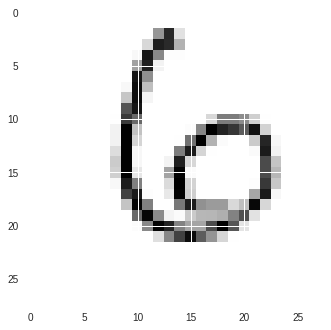

In [15]:

#Step 7: Predict

hereismyimageindextopredict = 100


predictedResults = network.predict(testXready[hereismyimageindextopredict:hereismyimageindextopredict+1])
print("Predicted Results: " + str(predictedResults))
predictedclass = predictedResults.argmax()


predictedResults = np.around(predictedResults)
print("Predicted Results: " + str(predictedResults))


print("Ground Truth OHE : " + str(testYready[hereismyimageindextopredict:hereismyimageindextopredict+1]))

print("Ground Truth :      " + str(testY[hereismyimageindextopredict:hereismyimageindextopredict+1]))

print("Predicited class is : " + str(predictedclass))

print("My nerual network predicts the below image as : " + str(predictedclass))


pyplot.imshow(testX[hereismyimageindextopredict])
pyplot.show()


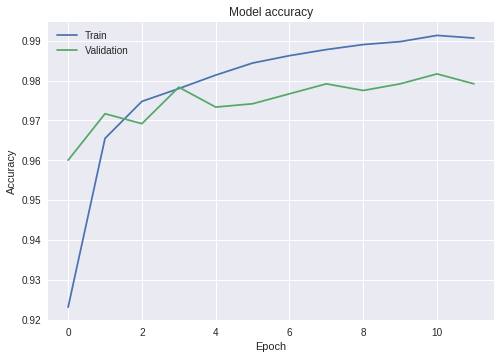

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train' , 'Validation'], loc='upper left')
plt.show()

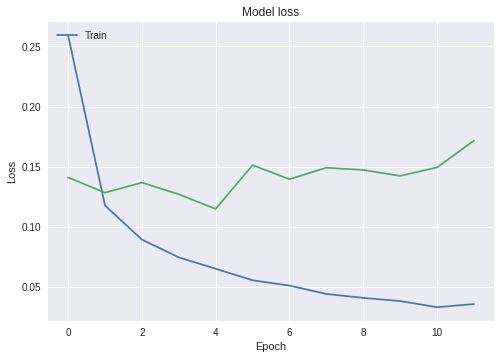

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
#Step 6: Evaluate the network
metrics_test_loss, metrics_test_accuracy = network.evaluate(testXready, testYready)

print(" Loss on test data is: " + str(metrics_test_loss))
print(" Accuracy of my nerual network on test data in percentage is : " + str(metrics_test_accuracy* 100))

10000/10000 [==============================] - 0s 46us/step
 Loss on test data is: 0.14425994273255724
 Accuracy of my nerual network on test data in percentage is : 97.58
